In [1]:
# 1.Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/synthetic/attention_platform_monthly.csv")

In [2]:
# 2.Normalize Components
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["SP", "NP", "AI"]] = scaler.fit_transform(
    df[["sessions_per_day", "notifications_per_day", "ads_per_hour"]]
)
df["EDP"] = 1 - df["monthly_retention_rate"]
df["EDP"] = scaler.fit_transform(df[["EDP"]])

In [3]:
# 3.Compute DFI
df["digital_fatigue_index"] = (
    0.25 * df["SP"] +
    0.25 * df["NP"] +
    0.25 * df["AI"] +
    0.25 * df["EDP"]
)

In [4]:
# 4.Platform-Level Fatigue Score
dfi_platform = (
    df.groupby("platform")["digital_fatigue_index"]
      .mean()
      .sort_values(ascending=False)
)
dfi_platform

platform
YouTube        0.528649
Google News    0.522563
Netflix        0.507883
Instagram      0.491363
Spotify        0.434893
Coursera       0.428260
Name: digital_fatigue_index, dtype: float64

In [5]:
# 5.Fatigue Risk Classification
def fatigue_level(score):
    if score < 0.33:
        return "Low Fatigue"
    elif score < 0.66:
        return "Medium Fatigue"
    else:
        return "High Fatigue"

df["fatigue_level"] = df["digital_fatigue_index"].apply(fatigue_level)

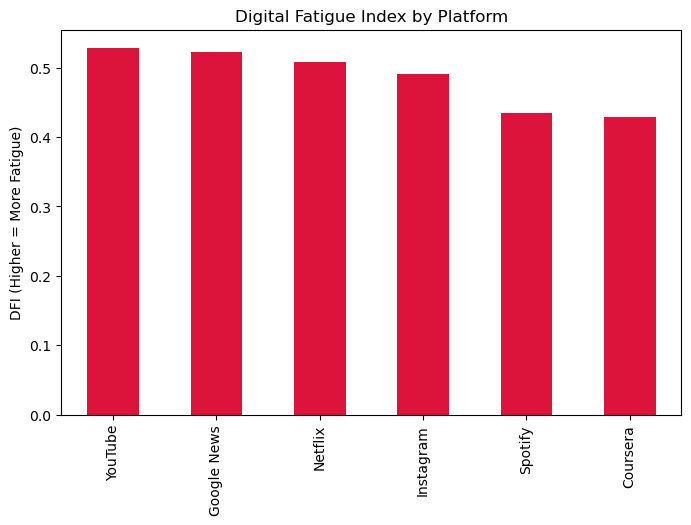

In [6]:
# 6.Visualization — Fatigue Ranking
plt.figure(figsize=(8,5))
dfi_platform.plot(kind="bar", color="crimson")
plt.title("Digital Fatigue Index by Platform")
plt.ylabel("DFI (Higher = More Fatigue)")
plt.xlabel("")
plt.show()

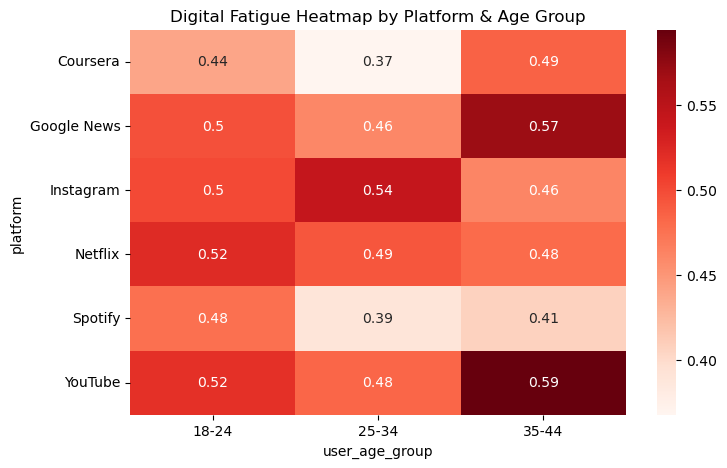

In [7]:
# 7.Fatigue Heatmap (Power Insight)
heatmap_data = (
    df.groupby(["platform", "user_age_group"])["digital_fatigue_index"]
      .mean()
      .unstack()
)

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, cmap="Reds")
plt.title("Digital Fatigue Heatmap by Platform & Age Group")
plt.show()

# Markdown Insights 

Sample Insights

High notification density is the strongest fatigue driver

Platforms with high session frequency but low session depth show early burnout signs

Younger demographics are more fatigue-prone

High fatigue platforms often show declining retention

✅ Phase 4 Completion Checklist

✔ Fatigue index built
✔ Platforms classified
✔ Heatmap created
✔ Behavioral insights written